In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print("Iris dataset loaded successfully!")
display(df.head())

Iris dataset loaded successfully!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(" Training samples:", len(X_train))
print(" Testing samples:", len(X_test))

 Training samples: 120
 Testing samples: 30


In [5]:
def chi_squared_distance(x1, x2):
    """Compute Chi-squared distance between two vectors."""
    return np.sum(((x1 - x2) ** 2) / (x1 + x2 + 1e-10)) 

In [6]:
class KNN_ChiSquared:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_one(self, x):
        # Calculate distances from x to all training points
        distances = [chi_squared_distance(x, x_train) for x_train in self.X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get their labels
        k_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        return max(set(k_labels), key=k_labels.count)
    
    def predict(self, X_test):
        return np.array([self.predict_one(x) for x in X_test])


In [7]:
k = 5  
model = KNN_ChiSquared(k=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n Accuracy: {acc:.4f}")
print("\n Confusion Matrix:")
print(cm)


 Accuracy: 0.9667

 Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


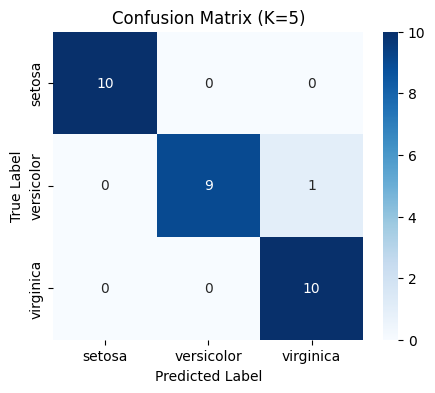

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (K={k})")
plt.show()